In [22]:
from pybaseball import statcast
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import schedule_and_record
from pybaseball import pitching_stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [26]:
yankees = schedule_and_record(1927, 'NYY')
redsox = schedule_and_record(2018, 'BOS')
reds = schedule_and_record(1976, 'CIN')
mariners = schedule_and_record(2001, 'SEA')
cardinals = schedule_and_record(2004, 'STL')

In [29]:
yankees.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,155.000000,155.000000,155.000000,155.0,132.000000,155.000000
mean,6.290323,3.864516,9.103226,1.0,20977.787879,1.735484
std,3.939424,2.817103,0.968157,0.0,14789.945028,2.588881
min,0.000000,0.000000,5.000000,1.0,1500.000000,-4.000000
25%,3.000000,2.000000,9.000000,1.0,10000.000000,-1.000000
50%,6.000000,3.000000,9.000000,1.0,15500.000000,2.000000
75%,8.000000,6.000000,9.000000,1.0,30000.000000,3.000000
max,21.000000,14.000000,18.000000,1.0,72641.000000,9.000000


In [24]:
mariners.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.0,162.000000,162.000000
mean,5.722222,3.870370,9.166667,1.0,37564.376543,2.080247
std,3.406698,3.009589,0.680245,0.0,10771.969761,3.315648
min,0.000000,0.000000,9.000000,1.0,11687.000000,-4.000000
25%,3.000000,2.000000,9.000000,1.0,30071.000000,-1.000000
50%,5.000000,3.000000,9.000000,1.0,42362.000000,2.000000
75%,8.000000,5.000000,9.000000,1.0,45651.750000,3.000000
max,16.000000,15.000000,14.000000,1.0,61065.000000,15.000000


In [27]:
redsox.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,5.407407,3.993827,9.185185,1.092593,32870.351852,1.407407
std,3.562321,2.930874,0.715596,0.366375,7847.691612,2.669253
min,0.000000,0.000000,9.000000,1.000000,10194.000000,-3.000000
25%,3.000000,2.000000,9.000000,1.000000,30380.000000,-1.000000
50%,5.000000,3.000000,9.000000,1.000000,35215.500000,1.000000
75%,7.000000,6.000000,9.000000,1.000000,37005.500000,3.000000
max,19.000000,13.000000,13.000000,4.000000,47351.000000,10.000000


In [28]:
reds.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,154.000000,162.000000
mean,5.290123,3.907407,9.246914,1.135802,29033.474026,0.839506
std,3.330048,2.797083,1.033968,0.361264,13331.318368,2.084887
min,0.000000,0.000000,7.000000,1.000000,5219.000000,-4.000000
25%,3.000000,2.000000,9.000000,1.000000,18227.250000,-1.000000
50%,5.000000,3.000000,9.000000,1.000000,28114.000000,1.000000
75%,7.000000,5.000000,9.000000,1.000000,38292.500000,2.000000
max,14.000000,14.000000,16.000000,3.000000,53652.000000,7.000000


In [30]:
cardinals.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,5.277778,4.067901,9.135802,2.018519,34152.913580,1.271605
std,3.044698,2.748521,0.540372,1.530121,10220.838972,2.585254
min,0.000000,0.000000,9.000000,1.000000,5332.000000,-4.000000
25%,3.000000,2.000000,9.000000,1.000000,27782.250000,-1.000000
50%,5.000000,4.000000,9.000000,1.000000,35143.000000,1.000000
75%,7.000000,6.000000,9.000000,3.000000,41264.000000,3.000000
max,13.000000,12.000000,13.000000,6.000000,54119.000000,9.000000


In [31]:
# create a numeric indicator of a win (1) and take sum of wins at each point in the season

mariners['win-count'] = np.where(mariners['W/L']=='W', 1, 0).cumsum()
yankees['win-count'] = np.where(yankees['W/L']=='W', 1, 0).cumsum()
reds['win-count'] = np.where(reds['W/L']=='W', 1, 0).cumsum()
redsox['win-count'] = np.where(redsox['W/L']=='W', 1, 0).cumsum()
cardinals['win-count'] = np.where(cardinals['W/L']=='W', 1, 0).cumsum()

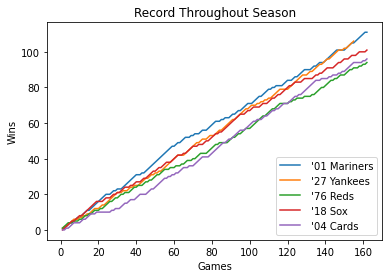

In [32]:
plt.plot(mariners['win-count'],label=" '01 Mariners")
plt.plot(yankees['win-count'],label=" '27 Yankees")
plt.plot(reds['win-count'],label=" '76 Reds")
plt.plot(redsox['win-count'],label=" '18 Sox")
plt.plot(cardinals['win-count'],label=" '04 Cards")
plt.legend(loc=4)
plt.xlabel('Games')
plt.ylabel('Wins')
plt.title('Record Throughout Season');

In [33]:
#score differential (runs - runs against)

mariners['scorediff'] = (mariners['R'] - mariners['RA']).cumsum()
yankees['scorediff'] = (yankees['R'] - yankees['RA']).cumsum()
reds['scorediff'] = (reds['R'] - reds['RA']).cumsum()
redsox['scorediff'] = (redsox['R'] - redsox['RA']).cumsum()
cardinals['scorediff'] = (cardinals['R'] - cardinals['RA']).cumsum()

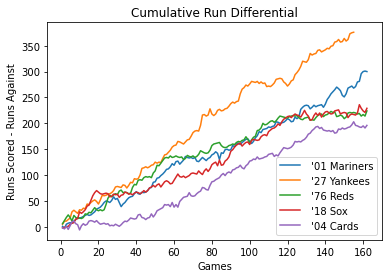

In [34]:
plt.plot(mariners['scorediff'],label=" '01 Mariners")
plt.plot(yankees['scorediff'],label=" '27 Yankees")
plt.plot(reds['scorediff'],label=" '76 Reds")
plt.plot(redsox['scorediff'],label=" '18 Sox")
plt.plot(cardinals['scorediff'],label=" '04 Cards")
plt.legend(loc=4)
plt.xlabel('Games')
plt.ylabel('Runs Scored - Runs Against')
plt.title('Cumulative Run Differential');